In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import time
import random
import re
from scipy.stats import t
from scipy import stats

# I. Data Preparation

In [ ]:
curr_path = '/content/drive/MyDrive/Self-study/ML/melon/'
date_df = pd.read_csv(curr_path + 'melon_data/date.csv')
date_df = date_df.sample(n= 25, random_state = 1)

# read all charts file 
startDay_list = []

for row_idx, row_series in date_df.iterrows():
    startDay_list.append(row_series[5])

startDay_list = startDay_list[:-1]
file_path_list = [curr_path + 'melon_data/chart/{startDay}.csv'.format(startDay = day) for day in startDay_list]

#concatenate all charts
all_charts_df = pd.DataFrame({'rank':[], 'song_name': [], 'song_id': [], 'artist_name':[], 'artist_id':[], 'alb_name' :[], 'alb_id':[]})

for file_path in file_path_list:
    additional_df = pd.read_csv(file_path)
    all_charts_df = all_charts_df.append(additional_df, ignore_index = True)

In [ ]:
unique_songs_df.drop(['rank'], axis = 1, inplace  = True)
unique_songs_df.to_csv(curr_path + 'melon_data/unique_songs_df.csv')

In [ ]:
unique_songs_df

,highest_ranking,song_name,song_id,artist_name,artist_id,alb_name,alb_id,Unnamed: 0
0,1.0,Dynamite,32872978.0,방탄소년단,672375.0,Dynamite (DayTime Version),10479150.0,0.0
2099,1.0,That That (prod. & feat. SUGA of BTS),34997078.0,싸이 (PSY),3865.0,싸다9,10937474.0,0.0
100,1.0,지나오다,30699142.0,닐로(Nilo),896096.0,About You,10106853.0,0.0
1999,1.0,How You Like That,32720013.0,BLACKPINK,995169.0,How You Like That,10451566.0,0.0
1899,1.0,바람만바람만,1497527.0,김종국,1692.0,S.101,332407.0,0.0
...,...,...,...,...,...,...,...,...
1298,100.0,기다렸다 가,30215199.0,다이나믹 듀오,108358.0,Mixxxture Project Vol.1,10033099.0,99.0
998,100.0,Sleepless,31658895.0,에픽하이 (EPIK HIGH),108356.0,sleepless in __________,10259609.0,99.0
1198,100.0,실화 (원곡가수 린),3677753.0,소피야 (Sophiya),620773.0,'위대한 탄생 시즌2' 멘토스쿨 Part.6 (이선희 편),2065246.0,99.0
1798,100.0,여자사람친구,5773993.0,가비엔제이,174997.0,여자사람친구,2328661.0,99.0


### Data Exploring

In [ ]:
curr_path = '/content/drive/MyDrive/Self-study/ML/melon/'
unique_songs_df = pd.read_csv(curr_path + 'melon_data/unique_songs_df.csv')
unique_songs_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

In [ ]:
unique_songs_df.head(3)

,highest_ranking,song_name,song_id,artist_name,artist_id,alb_name,alb_id
0,1.0,Dynamite,32872978.0,방탄소년단,672375.0,Dynamite (DayTime Version),10479150.0
1,1.0,That That (prod. & feat. SUGA of BTS),34997078.0,싸이 (PSY),3865.0,싸다9,10937474.0
2,1.0,지나오다,30699142.0,닐로(Nilo),896096.0,About You,10106853.0


In [ ]:
unique_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   highest_ranking  1898 non-null   float64
 1   song_name        1898 non-null   object 
 2   song_id          1897 non-null   float64
 3   artist_name      1898 non-null   object 
 4   artist_id        1898 non-null   float64
 5   alb_name         1898 non-null   object 
 6   alb_id           1898 non-null   float64
dtypes: float64(4), object(3)
memory usage: 103.9+ KB


Only 1 NaN so consider dropping it

In [ ]:
unique_songs_df.dropna(inplace = True)

### Scrape song_likes

In [ ]:
def get_song_likes(song_id):
    main_url = 'https://www.melon.com/commonlike/getSongLike.json?contsIds={song_id}'
    sub_url = main_url.format(song_id = song_id)
    user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'
    headers = {'User-Agent': user_agent}
    r = requests.get(sub_url, headers = headers).json()
    return r['contsLike'][0]['SUMMCNT']

In [ ]:
song_likes_dict = {}
for id in unique_songs_df['song_id']:
    id = int(id)
    song_likes_dict[id] = get_song_likes(id)

In [ ]:
song_likes_df = pd.DataFrame([song_likes_dict]).T.reset_index()
song_likes_df.rename(columns = {'index': 'song_id', 0: 'song_likes'}, inplace = True)

In [ ]:
song_likes_df.head(3)

,song_id,song_likes
0,32872978,440195
1,34997078,115915
2,30699142,247526


In [ ]:
unique_songs_df = unique_songs_df.merge(song_likes_df, on = 'song_id')

In [ ]:
unique_songs_df.to_csv(curr_path + 'melon_data/unique_songs_df.csv')

In [ ]:
unique_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1897 entries, 0 to 1896
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   highest_ranking  1897 non-null   float64
 1   song_name        1897 non-null   object 
 2   song_id          1897 non-null   float64
 3   artist_name      1897 non-null   object 
 4   artist_id        1897 non-null   float64
 5   alb_name         1897 non-null   object 
 6   alb_id           1897 non-null   float64
 7   song_likes       1897 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 133.4+ KB


In [ ]:
unique_songs_df.head(3)

,highest_ranking,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes
0,1.0,Dynamite,32872978.0,방탄소년단,672375.0,Dynamite (DayTime Version),10479150.0,440195
1,1.0,That That (prod. & feat. SUGA of BTS),34997078.0,싸이 (PSY),3865.0,싸다9,10937474.0,115915
2,1.0,지나오다,30699142.0,닐로(Nilo),896096.0,About You,10106853.0,247526


### Extract artist metadata

In [ ]:
curr_path = '/content/drive/MyDrive/Self-study/ML/melon/'
unique_songs_df = pd.read_csv(curr_path + 'melon_data/unique_songs_df.csv')
unique_songs_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
unique_songs_df.head(3)

,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes
0,Dynamite,32872978.0,방탄소년단,672375.0,Dynamite (DayTime Version),10479150.0,440195
1,Life Goes On,33077234.0,방탄소년단,672375.0,BE,10521521.0,240484
2,작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey),31737197.0,방탄소년단,672375.0,MAP OF THE SOUL : PERSONA,10273641.0,438387


In [ ]:
main_url = 'https://www.melon.com/artist/detail.htm?artistId={artist_id}'
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'
headers = {'User-Agent': user_agent}

def get_artist_metadata(artist_id):
    sub_url = main_url.format(artist_id = artist_id)
    r = requests.get(sub_url, headers = headers)
    bs = BeautifulSoup(r.text)

    temp_dict = {}
    
    ####
    bs_info1 = bs.find('div', {'class': 'section_atistinfo03'})

    pattern = r'(\d{4}(?:\.\d{2}\.\d{2})?)'
    try:    
        target = bs_info1.find('dl', {'class': 'list_define clfix'}).text
        temp_dict['debut_date'] = re.findall(pattern, target)[0]
    except:
        temp_dict['debut_date'] = np.nan

    pattern =  r'유형\n(\w*)[\s\S]*\|(\w*)'
    try: 
        temp_dict['artist_type'], temp_dict['artist_gender'] = re.findall(pattern, target)[0]
    except:
        temp_dict['artist_type'], temp_dict['artist_gender'] = np.nan, np.nan

    ####
    bs_info2 = bs.find('div', {'class': 'section_atistinfo04'})

    pattern = r'국적\n(\w*)'
    try: 
        target = bs_info2.find('dl', {'class': 'list_define clfix'}).text
        temp_dict['artist_nationality'] = re.findall(pattern, target)[0]
    except: 
        temp_dict['artist_nationality'] = np.nan

    return temp_dict 

In [ ]:
artist_metadata = {}
i = 1
for artist_id in unique_songs_df['artist_id']:
    artist_id = int(artist_id)
    if artist_id in artist_metadata:
        continue
    artist_metadata[artist_id] = get_artist_metadata(artist_id)
    if i%10 == 0:
        secs = random.random()*5
        time.sleep(secs)
    i += 1

artist_metadata_df = pd.DataFrame(artist_metadata).T
artist_metadata_df.reset_index(inplace = True)
artist_metadata_df.rename(columns = {'index': 'artist_id'},inplace = True)
artist_metadata_df.to_csv(curr_path + 'melon_data/artist_metadata0.csv')

In [ ]:
unique_songs_df = unique_songs_df.merge(artist_metadata_df, on = 'artist_id')
unique_songs_df.to_csv(curr_path + 'melon_data/unique_songs_df_final.csv')

In [ ]:
unique_songs_df

,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes,debut_date,artist_type,artist_gender,artist_nationality
0,Dynamite,32872978.0,방탄소년단,672375.0,Dynamite (DayTime Version),10479150.0,440195,2013.06.13,그룹,남성,대한민국
1,Life Goes On,33077234.0,방탄소년단,672375.0,BE,10521521.0,240484,2013.06.13,그룹,남성,대한민국
2,작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey),31737197.0,방탄소년단,672375.0,MAP OF THE SOUL : PERSONA,10273641.0,438387,2013.06.13,그룹,남성,대한민국
3,ON,32399830.0,방탄소년단,672375.0,MAP OF THE SOUL : 7,10377346.0,264622,2013.06.13,그룹,남성,대한민국
4,봄날,30244931.0,방탄소년단,672375.0,YOU NEVER WALK ALONE,10037969.0,562613,2013.06.13,그룹,남성,대한민국
...,...,...,...,...,...,...,...,...,...,...,...
1892,가을 우체국 앞에서,33618864.0,김대명,2086543.0,슬기로운 의사생활 시즌2 OST Part 2,10636269.0,59145,2010,솔로,남성,대한민국
1893,나보다 더 사랑해요,32560653.0,김호중,720018.0,나보다 더 사랑해요,10423519.0,46524,2010,솔로,남성,대한민국
1894,미치도록 (Feat. 길미),1758723.0,마르코,230591.0,Music Is My Life,360193.0,1329,2007,솔로,남성,대한민국
1895,Jelly Pop,3456950.0,지피베이직,492173.0,Jelly Pop,1317388.0,286,2010,그룹,여성,대한민국


# II. Perform Statistical Analysis

In [ ]:
curr_path = '/content/drive/MyDrive/Self-study/ML/melon/'
unique_songs_df = pd.read_csv(curr_path + 'melon_data/unique_songs_df_final.csv')
unique_songs_df.drop(['Unnamed: 0'], inplace = True, axis = 1)
unique_songs_df.tail(3)

,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes,debut_date,artist_type,artist_gender,artist_nationality
1894,미치도록 (Feat. 길미),1758723.0,마르코,230591.0,Music Is My Life,360193.0,1329,2007,솔로,남성,대한민국
1895,Jelly Pop,3456950.0,지피베이직,492173.0,Jelly Pop,1317388.0,286,2010,그룹,여성,대한민국
1896,실화 (원곡가수 린),3677753.0,소피야 (Sophiya),620773.0,'위대한 탄생 시즌2' 멘토스쿨 Part.6 (이선희 편),2065246.0,1448,2015.07.22,솔로,여성,영국


### Data Wrangling - Korean to English

In [ ]:
unique_songs_df['artist_type'].value_counts()
#솔로: solo, 그룹: group

NameError: ignored

In [ ]:
unique_songs_df['artist_type'] = np.where(unique_songs_df['artist_type'] == '솔로', 'solo', 'group')

In [ ]:
unique_songs_df['artist_gender'].value_counts()
#남성: male, 여성: female, 혼성: undefined

남성    1256
여성     673
혼성      52
Name: artist_gender, dtype: int64

In [ ]:
unique_songs_df.replace({'artist_gender': {'남성': 'male', '여성': 'female', '혼성': 'undefined'}}, inplace = True)

In [ ]:
unique_songs_df['artist_nationality'].value_counts()
#대한민국: korean

대한민국       1878
미국           64
영국           14
캐나다          13
오스트레일리아       6
뉴질랜드          2
프랑스           2
스웨덴           1
중국            1
Name: artist_nationality, dtype: int64

In [ ]:
unique_songs_df['artist_nationality'] = np.where(unique_songs_df['artist_nationality'] == '대한민국', 'korean', 'foreign')

### Data Exploring

In [ ]:
unique_songs_df.head(3)

,highest_ranking,song_name,song_id,artist_name,artist_id,alb_name,alb_id,song_likes,artist_type,artist_gender,artist_nationality
0,1.0,당신의 밤 (Feat. 오혁),30179089.0,황광희 X 개코,1285544.0,무한도전 위대한 유산,10027428.0,125157,group,male,korean
1,1.0,Butter,33507137.0,방탄소년단,672375.0,Butter,10612483.0,276050,group,male,korean
2,1.0,FAKE LOVE,31085237.0,방탄소년단,672375.0,LOVE YOURSELF 轉 'Tear',10168559.0,335138,group,male,korean


In [ ]:
unique_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1981
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   highest_ranking     1981 non-null   float64
 1   song_name           1981 non-null   object 
 2   song_id             1981 non-null   float64
 3   artist_name         1981 non-null   object 
 4   artist_id           1981 non-null   float64
 5   alb_name            1981 non-null   object 
 6   alb_id              1981 non-null   float64
 7   song_likes          1981 non-null   int64  
 8   artist_type         1981 non-null   object 
 9   artist_gender       1981 non-null   object 
 10  artist_nationality  1981 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 185.7+ KB


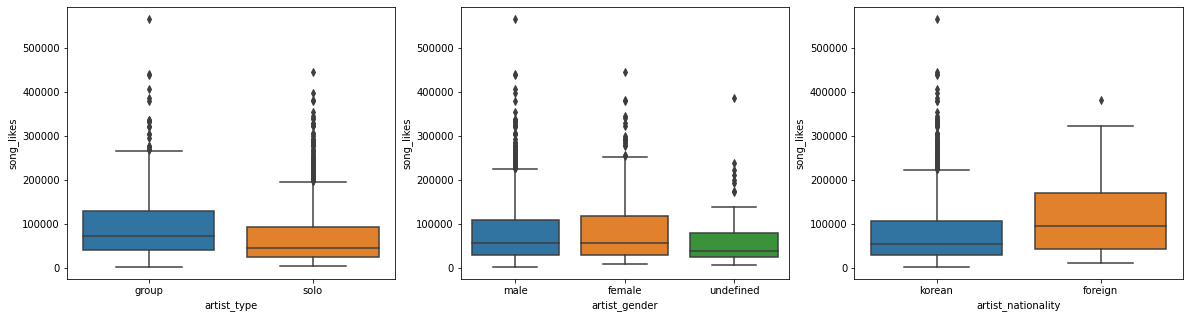

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.boxplot(x = 'artist_type', y = 'song_likes', data = unique_songs_df, ax = ax [0])
sns.boxplot(x = 'artist_gender', y = 'song_likes', data = unique_songs_df, ax = ax[1])
sns.boxplot(x = 'artist_nationality', y = 'song_likes', data = unique_songs_df, ax = ax[2])
plt.show()

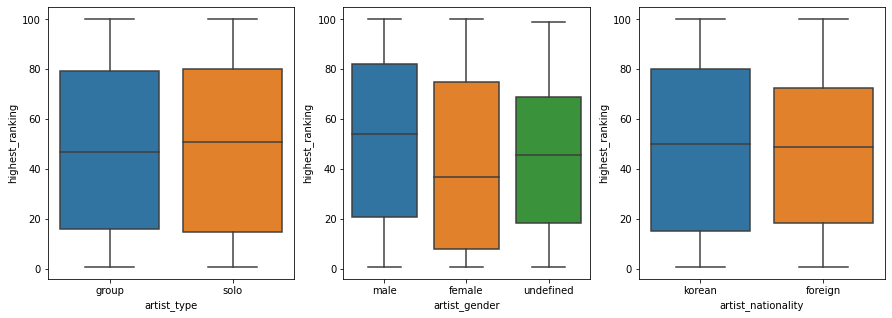

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.boxplot(x = 'artist_type', y = 'highest_ranking', data = unique_songs_df, ax = ax [0])
sns.boxplot(x = 'artist_gender', y = 'highest_ranking', data = unique_songs_df, ax = ax[1])
sns.boxplot(x = 'artist_nationality', y = 'highest_ranking', data = unique_songs_df, ax = ax[2])
plt.show()

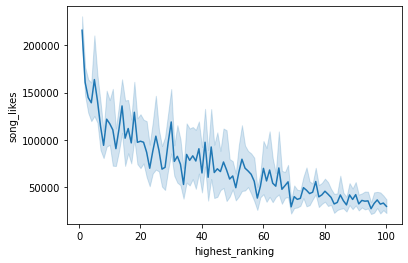

In [ ]:
sns.lineplot(x = 'highest_ranking', y = 'song_likes', data = unique_songs_df)

- song_likes has many outliers => draw a histogram to investigate
- Artist metadata seems to have influence on both song_likes and highest_ranking
- song_likes and highest_ranking is somewhat correlated'

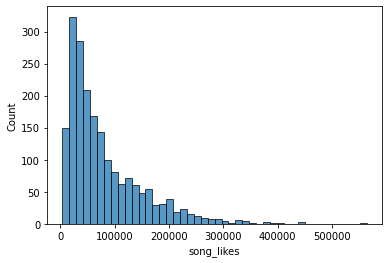

In [ ]:
sns.histplot(x = 'song_likes', data = unique_songs_df)
plt.show()

Apply log transformation on song_likes


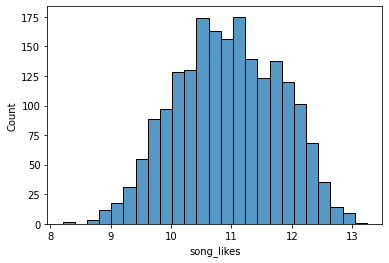

In [ ]:
sns.histplot(x = np.log(unique_songs_df['song_likes']))
plt.show()

In [ ]:
unique_songs_df['log_song_likes'] = np.log(unique_songs_df['song_likes'])

## Perform Statistical tests for log_song_likes
### Female artists vs Male artists


In [ ]:
unique_songs_df['artist_gender'].value_counts()

male         1256
female        673
undefined      52
Name: artist_gender, dtype: int64

In [ ]:
male_df = unique_songs_df[unique_songs_df['artist_gender'] == 'male']
female_df = unique_songs_df[unique_songs_df['artist_gender'] == 'female']
undefined_df = unique_songs_df[unique_songs_df['artist_gender'] == 'undefined']

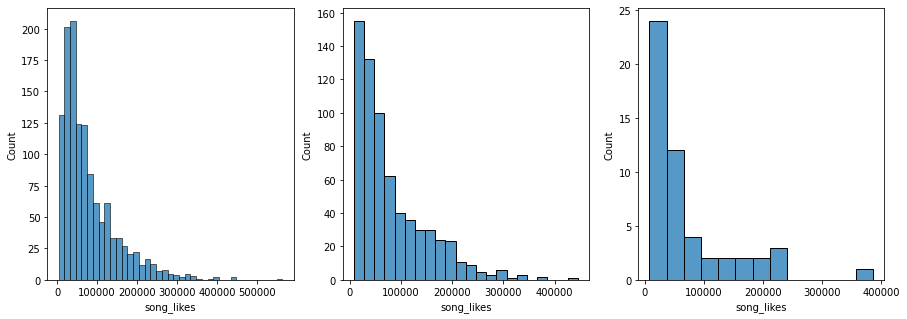

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.histplot(x = male_df['song_likes'], ax = ax[0])
sns.histplot(x = female_df['song_likes'], ax = ax[1])
sns.histplot(x = undefined_df['song_likes'], ax = ax[2])
plt.show()

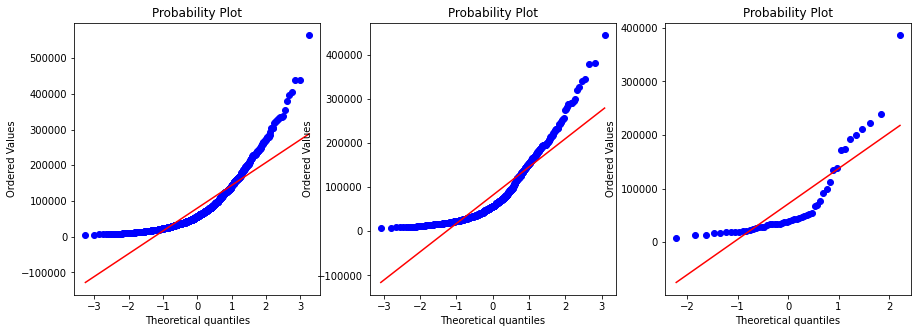

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(male_df['song_likes'], plot = ax[0])
stats.probplot(female_df['song_likes'], plot = ax[1])
stats.probplot(undefined_df['song_likes'], plot = ax[2])
plt.show()

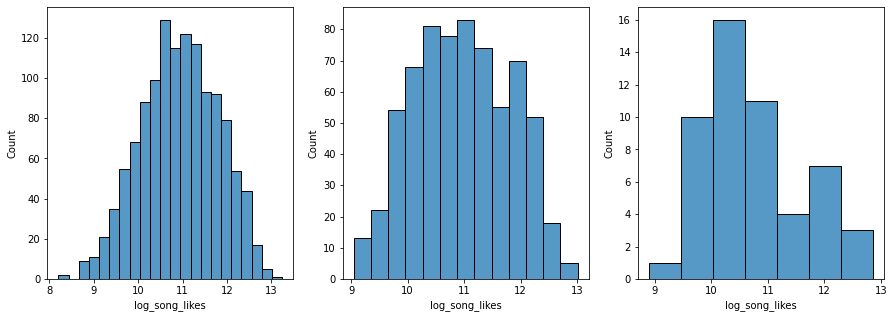

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.histplot(x = male_df['log_song_likes'], ax = ax[0])
sns.histplot(x = female_df['log_song_likes'], ax = ax[1])
sns.histplot(x = undefined_df['log_song_likes'], ax = ax[2])
plt.show()

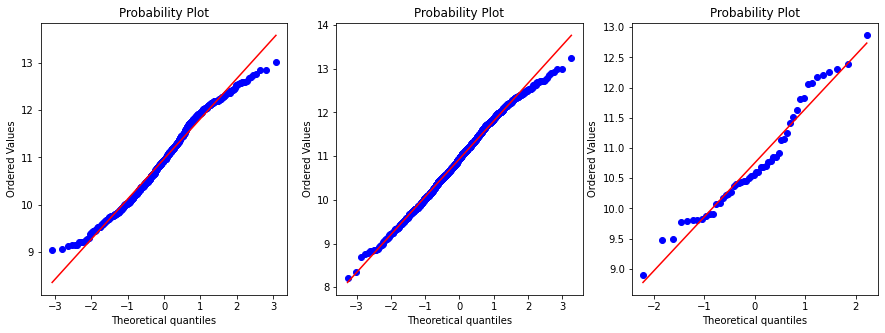

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(female_df['log_song_likes'], plot = ax[0])
stats.probplot(male_df['log_song_likes'], plot = ax[1])
stats.probplot(undefined_df['log_song_likes'], plot = ax[2])
plt.show()

- H_0: True mean of log song_likes of female artists = True mean of log song_likes of male artists
- H_a: True mean of log song_likes of female artists > True mean of log song_likes of male artists

Here we assume that the distribution of log song_likes for each population is normal

In [ ]:
def ttest(data1, data2):
    '''
    H0: True mean of data1 = true mean of data2
    Ha: True mean of data1 > true mean of data2
    significance level of 0.05
    '''
    len1, len2 = len(data1), len(data2)
    mean1, mean2 = np.mean(data1), np.mean(data2)
    se1, se2 = np.std(data1)/np.sqrt(len1), np.std(data2)/np.sqrt(len2)
    sed = np.sqrt(se1**2 + se2**2)
    t_stats = (mean1 - mean2)/sed
    df = ((se1**2 + se2**2)**2)/(se1**4/(len1-1) + se2**4/(len2-1))
    p = 1-t.cdf(t_stats,df)
    return p

In [ ]:
ttest(female_df['log_song_likes'], male_df['log_song_likes'])

0.211927391368808

Given the p-value ~ 0 and the significance level 0.05, we don't have enough evidence to reject the null hypothesis.

### Group artists vs Solo artists


- H_0: True mean of log song_likes of group artists = True mean of log song_likes of solo artists
- H_a: True mean of log song_likes of group artists > True mean of log song_likes of solo artists

Here we assume that the distribution of log song_likes for each population is normal

In [ ]:
group_df = unique_songs_df[unique_songs_df['artist_type'] == 'group']
solo_df = unique_songs_df[unique_songs_df['artist_type'] == 'solo']

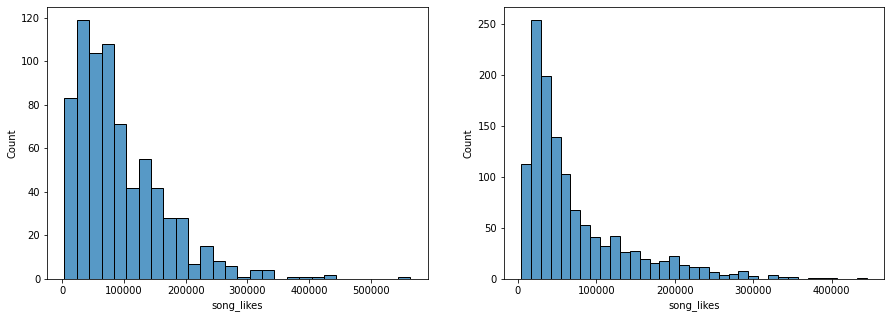

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.histplot(x = group_df['song_likes'], ax = ax[0])
sns.histplot(x = solo_df['song_likes'], ax = ax[1])
plt.show()

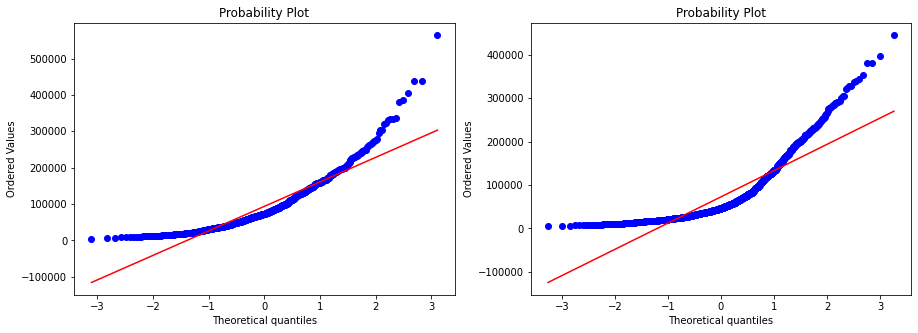

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(group_df['song_likes'], plot = ax[0])
stats.probplot(solo_df['song_likes'], plot = ax[1])
plt.show()

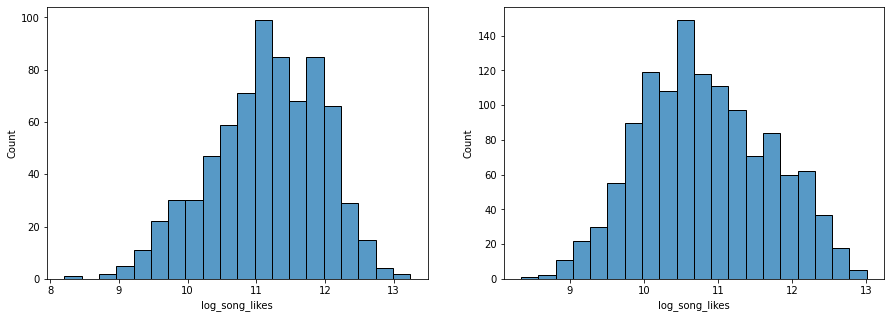

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.histplot(x = group_df['log_song_likes'], ax = ax[0])
sns.histplot(x = solo_df['log_song_likes'], ax = ax[1])
plt.show()

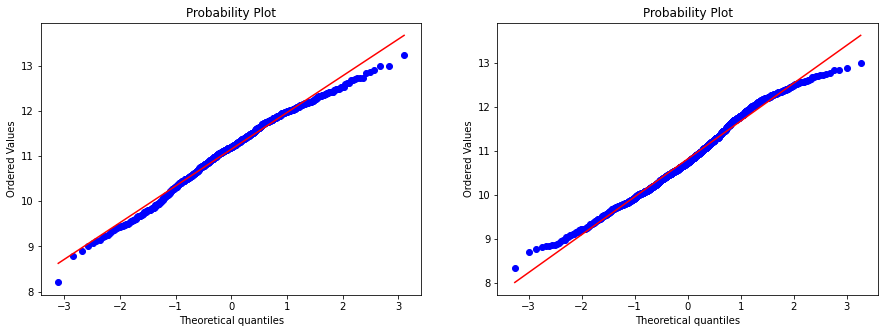

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(group_df['log_song_likes'], plot = ax[0])
stats.probplot(solo_df['log_song_likes'], plot = ax[1])
plt.show()

In [ ]:
ttest(group_df['log_song_likes'], solo_df['log_song_likes'])

0.0

Given the p-value ~ 0 and the significance level 0.05, we have enough evidence to reject the null hypothesis and accept the alternative hypothesis that the true mean of log song_likes of group artists > true mean of log song_likes of solo artists

### Foreign artists vs Korean artists

- H_0: True mean of log song_likes of foreign artists = True mean of log song_likes of korean artists
- H_a: True mean of log song_likes of foreign artists > True mean of log song_likes of korean artists

Here we assume that the distribution of log song_likes for each population is normal

In [ ]:
foreign_df = unique_songs_df[unique_songs_df['artist_nationality'] == 'foreign']
korean_df = unique_songs_df[unique_songs_df['artist_nationality'] == 'korean']

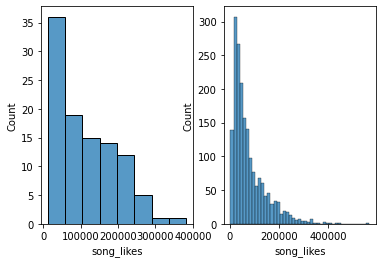

In [ ]:
fig, ax = plt.subplots(1,2)
sns.histplot(x = foreign_df['song_likes'], ax = ax[0])
sns.histplot(x = korean_df['song_likes'], ax = ax[1])
plt.show()

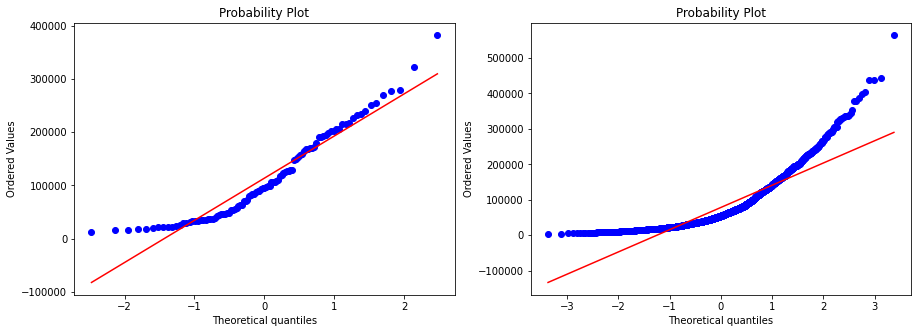

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(foreign_df['song_likes'], plot = ax[0])
stats.probplot(korean_df['song_likes'], plot = ax[1])
plt.show()

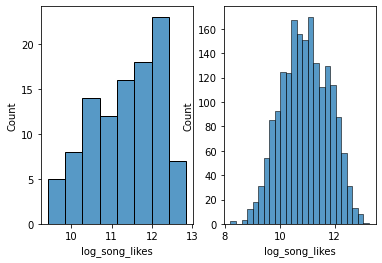

In [ ]:
fig, ax = plt.subplots(1,2)
sns.histplot(x = foreign_df['log_song_likes'], ax = ax[0])
sns.histplot(x = korean_df['log_song_likes'], ax = ax[1])
plt.show()

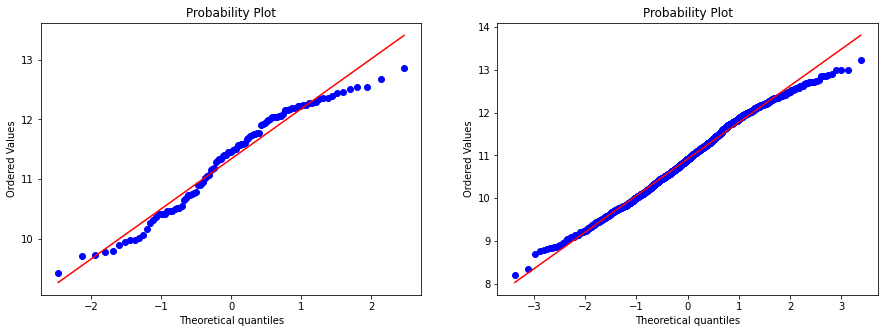

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
stats.probplot(foreign_df['log_song_likes'], plot = ax[0])
stats.probplot(korean_df['log_song_likes'], plot = ax[1])
plt.show()

In [ ]:
ttest(foreign_df['log_song_likes'], korean_df['log_song_likes'])

1.4163716282045158e-06

Given the p-value ~ 0 and the significance level 0.05, we have enough evidence to reject the null hypothesis and accept the alternative hypothesis that the true mean of log song_likes of foreign artists > the true mean of log song_likes of korean artists

## Scrape song_genres

In [ ]:
main_url = 'https://www.melon.com/song/detail.htm?songId={song_id}'

def get_song_genres(songId):
    sub_url = main_url.format(song_id = songId)
    user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'
    headers = {'User-Agent': user_agent}
    r = requests.get(sub_url, headers = headers)
    bs = BeautifulSoup(r.text)
    pattern = r'장르\n(.*)'
    try: 
        target = bs.find('div', {'class': 'meta'}).text
        genre = re.findall(pattern, target)[0]
    except:
        genre = np.nan
    return genre
    

In [ ]:
main_url = 'https://www.melon.com/song/detail.htm?songId=31266290'
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'
headers = {'User-Agent': user_agent}
r = requests.get(main_url, headers = headers)
bs = BeautifulSoup(r.text)
pattern = r'장르\n(.*)\n'
target = bs.text
re.findall(pattern, target)

['', '파워DJ', '랩/힙합']

In [ ]:
bs.find('div', {'class': 'meta'}).text

"\n\n앨범\nLOVE YOURSELF 結 'Answer'\n발매일\n2018.08.24\n장르\n랩/힙합\nFLAC\nFlac 16bit\n\n"

In [ ]:
get_song_genres(31266290)

NameError: ignored

In [ ]:
#temp_dict = {}
i = 1
for song_id in unique_songs_df['song_id']:
    if song_id in temp_dict:
        pass
    temp_dict[song_id] = get_song_genres(int(song_id))
    if i%10 == 0:
        secs = random.random()*5
        time.sleep(secs)
    i+=1

In [ ]:
unique_songs_df['song_id'][1:10]

1    33507137.0
2    31085237.0
3    31737197.0
4    32872978.0
5    31266290.0
6    32399830.0
7    33666269.0
8    30244931.0
9    33077234.0
Name: song_id, dtype: float64

In [ ]:
temp_dict

{30179089.0: nan,
 33507137.0: nan,
 31085237.0: nan,
 31737197.0: nan,
 32872978.0: nan,
 31266290.0: nan,
 32399830.0: nan,
 33666269.0: nan,
 30244931.0: nan,
 33077234.0: nan,
 30637982.0: nan,
 31085238.0: nan,
 32323969.0: nan,
 31737198.0: nan,
 32399832.0: nan,
 31266289.0: nan,
 32399834.0: nan,
 31737199.0: nan,
 31266282.0: nan,
 31085244.0: nan,
 32399827.0: nan,
 31737200.0: nan,
 30637983.0: nan,
 30029173.0: nan,
 31737201.0: nan,
 32399828.0: nan,
 31085239.0: nan,
 31737202.0: nan,
 31085240.0: nan,
 30637984.0: nan,
 31266291.0: nan,
 31085243.0: nan,
 30637988.0: nan,
 30637985.0: nan,
 32399835.0: nan,
 31085241.0: nan,
 30244932.0: nan,
 33077235.0: nan,
 32399833.0: nan,
 31085242.0: nan,
 31266288.0: nan,
 33077236.0: nan,
 30637987.0: nan,
 32399831.0: nan,
 31737196.0: nan,
 32399829.0: nan,
 32399837.0: nan,
 31085245.0: nan,
 31266286.0: nan,
 30637981.0: nan,
 31266292.0: nan,
 32399826.0: nan,
 30244934.0: nan,
 32399836.0: nan,
 33077238.0: nan,
 31085236.

Next step: scrape song genres, do ANOVA tests, learn more about causal inference

### Perform Linear Regression

- What should I choose? song_likes or highest_ranking? or a weighted value
- Should I split into train and test set?

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = unique_songs_df['artist_type', 'artist_gender', 'artist_nationality']
y = unique_songs_df['song_likes']
reg.fit(X, y)

KeyError: ignored